<h2>Data Structures and Algorithms Assignment week 1 Implementation</h2>
<h3>By: Paul Arah<h3/>

In [131]:
#Importing modules and external libraries
try:
    from time import time
    import matplotlib.pyplot as plt
    import re
    from guppy import hpy
    from pkgcore.config import load_config
    from random import choice
    from string import ascii_uppercase
except ImportError:
    print("Error Importing")
    %matplotlib inline

<p><strong>Question 1: </strong>Implement a basic measure of tracking the time taken to run an algorithm.</p>
<p>This is acheieved using the inbuilt time module in python. The time function  used from the time module returns the number of seconds passed since epoch. Calling and storing the time functions at the begining and end of a algorithm and taking the difference between the results is then used to determine how long a function takes to run.</p>


In [132]:
class Timer():
    def __init__(self):
        pass
    
    def start():
        return time()
    
    def end():
        return time()
    
    def t_value(start_time, end_time):
        return end_time - start_time

#the square functions take a numeric value and returns it square.
def square(n):
    start_time = time()
    val = n*n
    end_time = time()
    final = end_time - start_time
    return "The square of %d takes %10.7f seconds to run." %(n, final)
    
    
square(2)

'The square of 2 takes  0.0000007 seconds to run.'

<p><strong>Question 2: </strong>Implement a basic measure of tracking the space taken to run an algorithm.</p>
<p>Tracking the space used by an alogorith is achieved using <a href = "https://pypi.org/project/guppy3">guppy3</a> a Python Programming Environment & Heap analysis toolset. </p>


In [133]:
#creating an instance of the hpy class from the guppy package
ht = hpy()
#initialising a variable to input into our square function
test_val = 6
#The setrelheap method basically tells the main heap method to ignore every penultimate code before this
ht.setrelheap()
#calling the sum actual square function we are going to track
_ = square(test_val)

t = ht.heap()
raw = repr(t)
raw = raw.split()
mem = int(raw[10])
print("The square of %d uses up %1d bytes to run." %(test_val, mem))

The square of 6 uses up 2346 bytes to run.


<p><strong>Question 3: </strong> Implement the following 3 algorithms: <p>
<ol>
<li>Find the maximum value in a list</li> 
    <li>Make each letter in a string lowercase</li>
    <li>Sort a list of integers (using the inbuilt python method)</li>


In [134]:
#solution1 
def naive_max(list_input):
    #leverage on the max method to get the maximum value 
    return max(list_input)


def list_max(list_input):
    #assigns the first index in the list as the maxinum value
    max_val = list_input[0]
    #loops through the list and continously update's the max_val variable if the the number is greter than max_val
    for val in list_input:
        if val > max_val:
            max_val = val
    return max_val

In [135]:
 def naive_lower(string):
    #initialise the a holder variable to store the string input
    holder = string.lower()
    #returns a all lower case version of the string using the .lower methed
    return holder

def char_str(string):
    #initialise an empty string variable
    lower_str = ""
    #loops through every string char i
    for i in string:
        #convert each char to lower case and adds to the lower_str variable
        new += i.lower()
    return new
    

In [136]:
#sorts a list using the python inbuilt sorted function 
def list_sort(list_input):
    sorted_list  = sorted(list_input)
    #Returns a sorted version the input list 
    return sorted_list

<p><strong>Question 4: </strong> For each of the above algorithms, plot graphs showing how the time and space taken as the input size changes from length 1 to length 100. (Lengths of lists and lengths of strings).</p>



In [137]:
#The plot_algo takes in a function and the values for n as an array and plot's what happens to the time or space complexity 
# of the algorithm as the specified value of n increases.
#The functions takes in the vales of n, the time or space complexity, the title and labels for both axis
def plot_algo(n_values, t_n, plot_title, x_label, y_label):
    #plot 
    plt.plot(n_values, t_n)
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

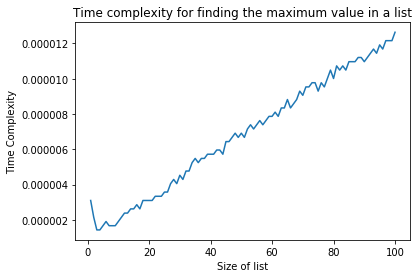

In [138]:
"""
This function generates a an increasing value of n (i.e increasing list size) 
and passes it into list_max function and plots the resulting values using the 
plot_algo function defined above.

"""
#Generates of lenth 100 using list comprehension
n1 = [i for i in range(1, 101)]
#An empty list that recieves the re


def cal_tcomplex(n):
    t_complex = []
    for i in range(1, len(n)+1):
        y = n[0:i]
        start = time()
        list_max(y)
        end = time()
        t_complex.append(end - start)
    return t_complex

t_complex1 = cal_tcomplex(n1)
plot_algo(n1, t_complex1, "Time complexity for finding the maximum value in a list", "Size of list", "Time Complexity")

Calculating Space Complexity...
Finished Calculation


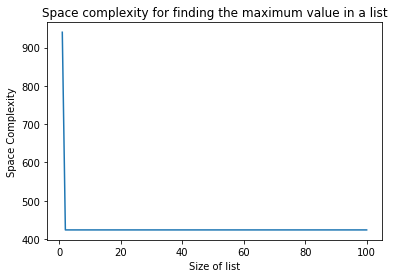

In [139]:
"""
This function generates a an increasing value of n (i.e increasing list size) 
and passes it into list_max function and plots the resulting values for the space complexity
using the plot_algo function defined above.

"""
#Creating an instance of the hpy object
hp = hpy()

def cal_space(n):
    space_used = []
    print("Calculating Space Complexity...")
    for i in range(1, len(n)+1):
        y = n[0:i]
        hp.setrelheap()
        list_max(y)
        h = hp.heap()
        raw_string = repr(h)
        raw_string = raw_string.split()
        space = int(raw_string[10])
        space_used.append(space)
    print("Finished Calculation")
    return space_used


s_complex1 = cal_space(n1)
plot_algo(n1, s_complex1, "Space complexity for finding the maximum value in a list", "Size of list", "Space Complexity")

In [140]:

#Generates a random string of length 100
n2 = ''.join(choice(ascii_uppercase) for i in range(100))


In [141]:
def cal_tcomplex2(n):
    t_complex = []
    for i in range(1, len(n)+1):
        y = n[0:i]
        start = time()
        naive_lower(y)
        end = time()
        t_complex.append(end - start)
    return t_complex

t_complex2 = cal_tcomplex2(n2)
print(len(t_complex2))

100


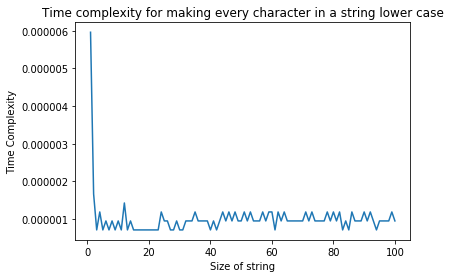

In [142]:
plot_algo(n1, t_complex2, "Time complexity for making every character in a string lower case", "Size of string", "Time Complexity")

Calculating Space Complexity...
Finished Calculation


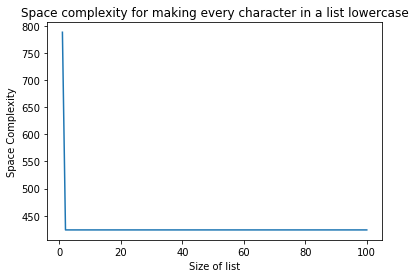

In [143]:
tp = hpy()

def cal_space(n):
    space_used = []
    print("Calculating Space Complexity...")
    for i in range(1, len(n)+1):
        y = n[0:i]
        hp.setrelheap()
        list_max(y)
        h = hp.heap()
        raw_string = repr(h)
        raw_string = raw_string.split()
        space = int(raw_string[10])
        space_used.append(space)
    print("Finished Calculation")
    return space_used


s_complex2 = cal_space(n2)
plot_algo(n1, s_complex2, "Space complexity for making every character in a list lowercase", "Size of list", "Space Complexity")

In [144]:
def cal_tcomplex2(n):
    t_complex = []
    for i in range(1, len(n)+1):
        y = n[0:i]
        start = time()
        list_sort(y)
        end = time()
        t_complex.append(end - start)
    return t_complex

t_complex3 = cal_tcomplex2(n1)
print(len(t_complex3))

100


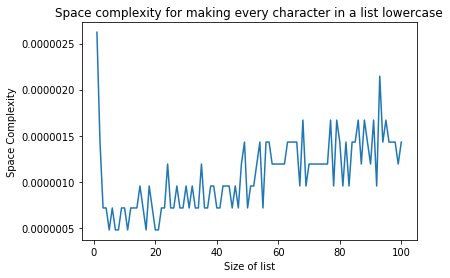

In [145]:
plot_algo(n1, t_complex3, "Space complexity for making every character in a list lowercase", "Size of list", "Space Complexity")

Calculating Space Complexity...
Finished Calculation


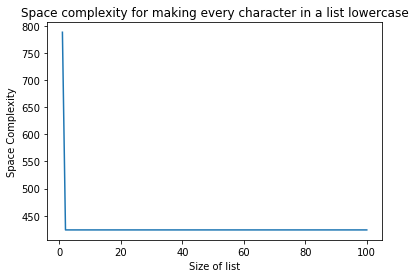

In [146]:
tf = hpy()

def cal_space(n):
    space_used = []
    print("Calculating Space Complexity...")
    for i in range(1, len(n)+1):
        y = n[0:i]
        tf.setrelheap()
        list_max(y)
        h = tf.heap()
        raw_string = repr(h)
        raw_string = raw_string.split()
        space = int(raw_string[10])
        space_used.append(space)
    print("Finished Calculation")
    return space_used


s_complex3 = cal_space(n1)
plot_algo(n1, s_complex2, "Space complexity for making every character in a list lowercase", "Size of list", "Space Complexity")

<p><strong>Question 4: </strong> Estimate how long each algorithm would take for for inputs of size 1,000,000. Write your estimate clearly in the code.</p>

<p><em>For the finding the maximum number in a list, the relationship between the time taken  for our algorithm to run and increasing values of our input size is linearly related  hence, our algorithm is </em>$O(n)$</p>

In [147]:
#Checking how long our list_max algorithm takes to run for an input size of 1
test1 = time()
list_max([1])
test2 = time()
result = test2 - test1
print("For an input size of 1, the algorithm took {} seconds to run".format(result))
#for an input size of 1,000,000, it will result * 1000000
answer = result * 1_000_000
print("For an input of size of 1,000,000 in the alogithm, it will take {} seconds".format(answer))

For an input size of 1, the algorithm took 7.414817810058594e-05 seconds to run
For an input of size of 1,000,000 in the alogithm, it will take 74.14817810058594 seconds


<p><em>For making every element in a list lower case, the relationship between and increasing values of our input size is constant in relation to the time taken for our algorithm to run hence, our algorithm is </em>$O(1)$</p>

In [148]:
#Checking how long our naive_max algorithm takes to run for an input size of 1
test3 = time()
naive_lower("e")
test4 = time()
result1 = test4 - test3
print("For an input size of 1, the algorithm took {} seconds to run".format(result))
#for an input size of 1,000,000, it will result * 1000000
answer1 = result1 * 1_000_000
print("For an input of size of 1,000,000 in the alogithm, it will take {} seconds".format(answer))

For an input size of 1, the algorithm took 7.414817810058594e-05 seconds to run
For an input of size of 1,000,000 in the alogithm, it will take 74.14817810058594 seconds


<p><em>For sorting a list using the in built sort function in python, the relationship between  increasing values of our input size is logarithimic in relation to the time taken for our algorithm to run hence, our algorithm is </em>$\mathcal{O}(n\log{}n)$</p>


In [149]:
#Checking how long our naive_max algorithm takes to run for an input size of 1
test5 = time()
list_sort([1])
test6 = time()
result2 = test6 - test5
print("For an input size of 1, the algorithm took {} seconds to run".format(result))
#for an input size of 1,000,000, it will result * 1000000
answer2 = result2 * 1_000_000
print("For an input of size of 1,000,000 in the alogithm, it will take {} seconds".format(answer))

For an input size of 1, the algorithm took 7.414817810058594e-05 seconds to run
For an input of size of 1,000,000 in the alogithm, it will take 74.14817810058594 seconds
